In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data_genetator = CmdStanModel(stan_file = 'generate_data.stan')

I= 7
N= 3
DoB= 19990914
seed=int(DoB+100*I+N)
print(seed)
generated_data = data_genetator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


19991617


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


### Model 3 - Sparsity enforcing prior

In [2]:
model_lap = CmdStanModel(stan_file = 'model3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
data_for_inference = {'N':100,
                      'M':200,
                      'x':generated_data.stan_variable('x')[0],
                      'y':generated_data.stan_variable('y')[0]
                      }

In [5]:
fit_lap = model_lap.sample(data=data_for_inference,seed=seed,adapt_delta=0.99,max_treedepth=12)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:06 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:22 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:27 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:33 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:39 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:44 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████      | 00:51 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:56 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 01:02 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 01:09 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 01:14 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 01:20 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 01:25 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |███████▋  | 


INFO:cmdstanpy:CmdStan done processing.


# <span style='color:Yellow'> Task 3. Evaluating model </span>

In [6]:
df = fit_lap.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta[1],beta[2],beta[3],...,beta[193],beta[194],beta[195],beta[196],beta[197],beta[198],beta[199],beta[200],alpha,sigma
0,-308.084,0.944287,0.006067,10.0,1023.0,0.0,423.543,-0.236364,1.301220,0.064127,...,0.446053,-0.082917,-0.671279,-0.770854,-0.242619,1.461610,0.067565,0.083262,2.306010,1.94042
1,-315.108,0.983705,0.006067,10.0,1023.0,0.0,428.607,-0.740204,1.135060,-0.211947,...,0.682731,0.191767,0.693760,0.014627,0.445863,1.483680,0.061147,0.199273,2.557670,1.79700
2,-312.392,0.999760,0.006067,10.0,1023.0,0.0,403.748,-0.401079,0.514359,-0.323504,...,-0.048148,-0.141119,-1.245530,0.618909,-0.223705,-1.273480,0.284498,0.006176,3.478290,1.73057
3,-325.282,0.965325,0.006067,10.0,1023.0,0.0,425.578,-0.812873,-0.151216,-0.419538,...,0.115351,-1.318670,-0.675599,0.923911,0.359805,-0.420761,0.071016,0.258264,3.153410,1.58402
4,-320.922,0.977412,0.006067,10.0,1023.0,0.0,427.037,-0.120596,0.811505,0.049336,...,-0.595843,1.159530,1.950850,-0.486694,-0.374671,1.178130,0.307481,0.310367,0.511177,2.11229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-290.472,0.996679,0.003516,11.0,2047.0,0.0,377.120,0.185348,1.354020,-0.469882,...,0.297583,-0.116944,1.331100,0.039567,0.011707,-0.254504,-0.106207,-0.328963,1.956420,1.47799
3996,-278.830,0.993113,0.003516,10.0,2047.0,0.0,377.523,0.496920,1.795610,-0.528595,...,0.214438,-0.023137,0.565771,-0.322184,-0.009183,0.125989,-0.007502,0.069020,1.645990,1.33341
3997,-285.149,0.982027,0.003516,11.0,2047.0,0.0,372.048,-0.836428,0.484977,-0.701734,...,-0.650626,0.081215,-0.153735,0.398773,0.367508,-0.112279,-0.101743,-0.216261,1.922500,1.48789
3998,-286.309,0.986329,0.003516,11.0,2047.0,0.0,376.940,0.318226,0.301998,-0.644130,...,0.312390,-0.428630,-0.075542,0.550578,0.826009,0.187371,-0.854111,-1.136110,2.944850,1.54225


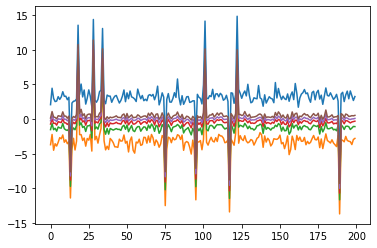

In [7]:
def plots(b):
    max = []
    min = []

    quantiles = {}
    quantiles['q1'] = []
    quantiles['q2'] = []
    quantiles['q3'] = []
    quantiles['q4'] = []
    quantiles['q5'] = []
    for i in range(b.shape[1]):
        b_c = b[:,i] 
        max.append(np.max(b_c))
        min.append(np.min(b_c))

    
        quantiles['q1'].append(np.quantile(b_c, 0.05))
        quantiles['q2'].append(np.quantile(b_c, 0.25))
        quantiles['q3'].append(np.quantile(b_c, 0.5))
        quantiles['q4'].append(np.quantile(b_c, 0.75))
        quantiles['q5'].append(np.quantile(b_c, 0.95))

    plt.plot(max)
    plt.plot(min)


    for i in range(1,len(quantiles.keys())):
        plt.plot(quantiles['q'+str(i)])

    plt.show()

beta = fit_lap.stan_variable('beta')
plots(beta)

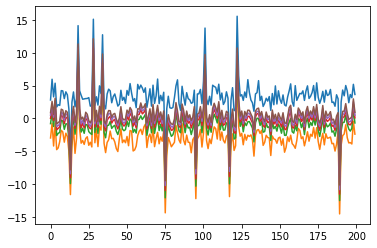

In [8]:
residues = beta - data_for_inference['x'][:,0]
plots(residues)